<a href="https://colab.research.google.com/github/lamsalshrawan/Thesis_RMC_PRnet/blob/main/Stuck_1_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Chainage', 'CRS', 'Torque', 'PRchd', 'Thrust', 'RMC', 'Lithology',
       'Weathering', 'Rock Strength', 'PRnet', 'RMC_Predicted'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

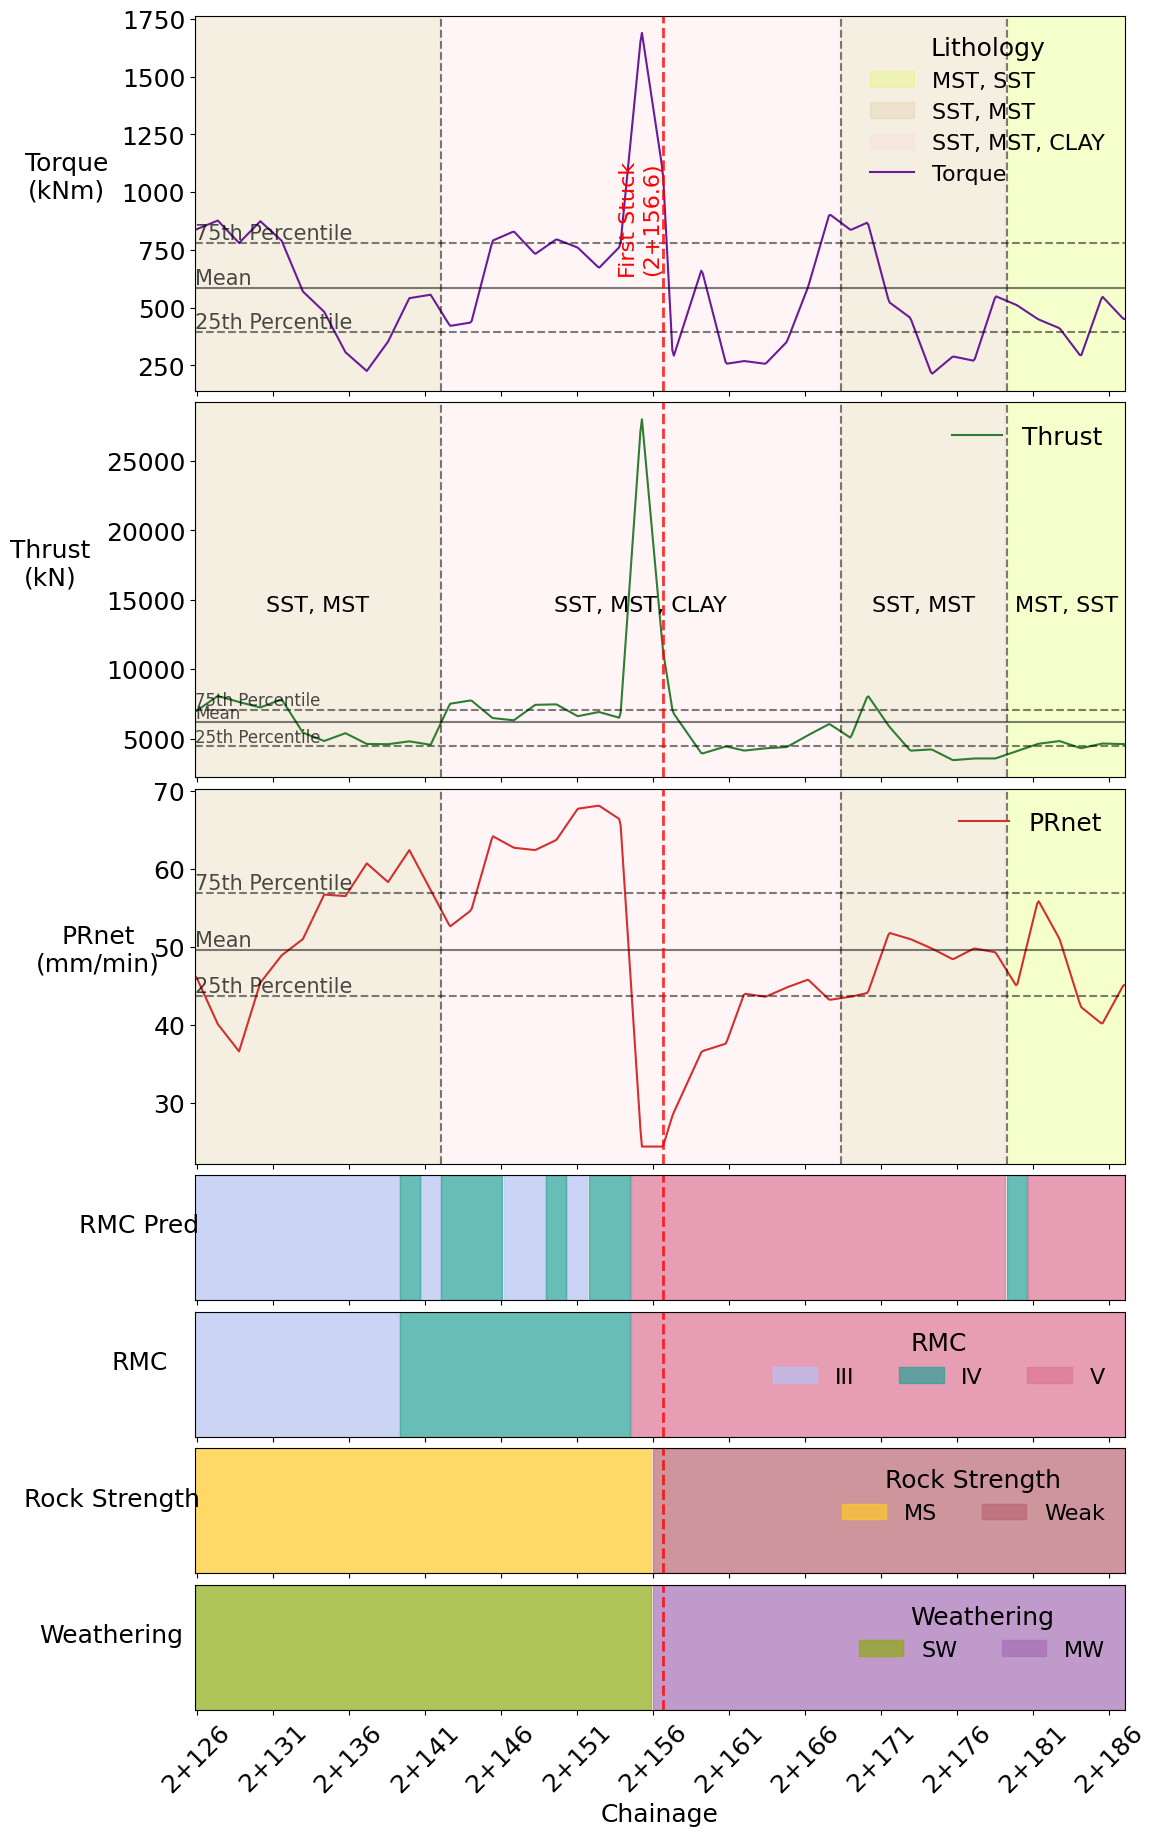

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from google.colab import files

# Set global font size
plt.rcParams.update({'font.size': 18})

# Load the Excel file from Google Drive
file_path = '/content/drive/My Drive/Stuck_1.xlsx'  # Update the path if necessary
data = pd.read_excel(file_path)
print(data.columns)

# Define color mappings for Lithology, RMC, Rock Strength, and Weathering
lithology_colors = {
    'SST, MST': '#d1b26f',      # Cyan (light blue-green)
    'SST, MST, CLAY': '#FFCDD2',  # Light red
    'MST, SST': '#cfff04'        # Light indigo
}

# Use darker themes for RMC to avoid white patches
rmc_colors = {
    'III': '#B7C3F3',
    'IV': '#28A197',
    'V': '#DD7596'
}

rock_strength_colors = {
    'MS': '#FFCA28',     # Amber
    'Weak': '#ba6873',   # Light purple
    'Strong': '#FFAB91'  # Light coral
}

weathering_colors = {
    'SW': '#8eab12',
    'MW': '#a66fb5'   # Light orange
}

# Interpolate Chainage to ensure continuous representation
chainage_min = data['Chainage'].min()
chainage_max = data['Chainage'].max()
# Extend the Chainage range slightly beyond the min and max to avoid gaps at the start and end
chainage_min_extended = chainage_min - 0.1
chainage_max_extended = chainage_max + 0.1
continuous_chainage = np.arange(chainage_min_extended, chainage_max_extended + 0.1, 0.1)

# Interpolate the data to match the continuous Chainage
data_interpolated = pd.DataFrame({'Chainage': continuous_chainage})

# Interpolate numerical columns (Torque, Thrust, PRnet)
for col in ['Torque', 'Thrust', 'PRnet']:
    data_interpolated[col] = np.interp(continuous_chainage, data['Chainage'], data[col])

# Interpolate categorical columns (RMC, RMC_Predicted, Rock Strength, Weathering, Lithology)
# Use nearest-neighbor interpolation to assign categories
for col in ['RMC', 'RMC_Predicted', 'Rock Strength', 'Weathering', 'Lithology']:
# Find the nearest Chainage value in the original data for each point in continuous_chainage
    indices = np.abs(continuous_chainage[:, None] - data['Chainage'].values[None, :]).argmin(axis=1)
    data_interpolated[col] = data[col].iloc[indices].values

# Define heights for subplots (shorter for categorical plots)
heights = [3, 3, 3, 1, 1, 1, 1]  # Numerical plots: 3, Categorical plots: 1

# Create the multi-panel plot with custom heights
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 22), sharex=True,
                         gridspec_kw={'height_ratios': heights})

# Calculate percentiles and mean for numerical plots
torque_25th = np.percentile(data_interpolated['Torque'], 25)
torque_mean = np.mean(data_interpolated['Torque'])
torque_75th = np.percentile(data_interpolated['Torque'], 75)

thrust_25th = np.percentile(data_interpolated['Thrust'], 25)
thrust_mean = np.mean(data_interpolated['Thrust'])
thrust_75th = np.percentile(data_interpolated['Thrust'], 75)

prnet_25th = np.percentile(data_interpolated['PRnet'], 25)
prnet_mean = np.mean(data_interpolated['PRnet'])
prnet_75th = np.percentile(data_interpolated['PRnet'], 75)

# Calculate the y-limits for each numerical subplot with a small buffer
torque_min = data_interpolated['Torque'].min()
torque_max = data_interpolated['Torque'].max()
torque_range = torque_max - torque_min
torque_buffer = 0.05 * torque_range  # 5% buffer
torque_ylim = (torque_min - torque_buffer, torque_max + torque_buffer)

thrust_min = data_interpolated['Thrust'].min()
thrust_max = data_interpolated['Thrust'].max()
thrust_range = thrust_max - thrust_min
thrust_buffer = 0.05 * thrust_range  # 5% buffer
thrust_ylim = (thrust_min - thrust_buffer, thrust_max + thrust_buffer)

prnet_min = data_interpolated['PRnet'].min()
prnet_max = data_interpolated['PRnet'].max()
prnet_range = prnet_max - prnet_min
prnet_buffer = 0.05 * prnet_range  # 5% buffer
prnet_ylim = (prnet_min - prnet_buffer, prnet_max + prnet_buffer)

# Plot 1: Torque
torque_line, = axes[0].plot(data_interpolated['Chainage'], data_interpolated['Torque'], color='#6A1B9A', label='Torque')  # Deep purple
axes[0].axhline(y=torque_25th, color='black', linestyle='--', alpha=0.5)
axes[0].axhline(y=torque_mean, color='black', linestyle='-', alpha=0.5)
axes[0].axhline(y=torque_75th, color='black', linestyle='--', alpha=0.5)
axes[0].text(chainage_min_extended, torque_25th, '25th Percentile', va='bottom', ha='left', fontsize=15, alpha=0.7)
axes[0].text(chainage_min_extended, torque_mean, 'Mean', va='bottom', ha='left', fontsize=15, alpha=0.7)
axes[0].text(chainage_min_extended, torque_75th, '75th Percentile', va='bottom', ha='left', fontsize=15, alpha=0.7)
axes[0].set_ylabel('Torque\n(kNm)', rotation=0, labelpad=40)
axes[0].set_ylim(torque_ylim)  # Set y-limits for Torque

# Plot 2: Thrust
thrust_line, = axes[1].plot(data_interpolated['Chainage'], data_interpolated['Thrust'], color='#2E7D32', label='Thrust')  # Dark green
axes[1].axhline(y=thrust_25th, color='black', linestyle='--', alpha=0.5)
axes[1].axhline(y=thrust_mean, color='black', linestyle='-', alpha=0.5)
axes[1].axhline(y=thrust_75th, color='black', linestyle='--', alpha=0.5)
axes[1].text(chainage_min_extended, thrust_25th, '25th Percentile', va='bottom', ha='left', fontsize=12, alpha=0.7)
axes[1].text(chainage_min_extended, thrust_mean, 'Mean', va='bottom', ha='left', fontsize=12, alpha=0.7)
axes[1].text(chainage_min_extended, thrust_75th, '75th Percentile', va='bottom', ha='left', fontsize=12, alpha=0.7)
axes[1].set_ylabel('Thrust\n(kN)', rotation=0, labelpad=40)
axes[1].legend(handles=[thrust_line], loc='upper right', frameon=False)
axes[1].set_ylim(thrust_ylim)  # Set y-limits for Thrust

# Plot 3: PRnet
prnet_line, = axes[2].plot(data_interpolated['Chainage'], data_interpolated['PRnet'], color='#D32F2F', label='PRnet')  # Deep red
axes[2].axhline(y=prnet_25th, color='black', linestyle='--', alpha=0.5)
axes[2].axhline(y=prnet_mean, color='black', linestyle='-', alpha=0.5)
axes[2].axhline(y=prnet_75th, color='black', linestyle='--', alpha=0.5)
axes[2].text(chainage_min_extended, prnet_25th, '25th Percentile', va='bottom', ha='left', fontsize=15, alpha=0.7)
axes[2].text(chainage_min_extended, prnet_mean, 'Mean', va='bottom', ha='left', fontsize=15, alpha=0.7)
axes[2].text(chainage_min_extended, prnet_75th, '75th Percentile', va='bottom', ha='left', fontsize=15, alpha=0.7)
axes[2].set_ylabel('PRnet\n(mm/min)', rotation=0, labelpad=40)
axes[2].legend(handles=[prnet_line], loc='upper right', frameon=False)  # Add PRnet legend with symbol on the right
axes[2].set_ylim(prnet_ylim)  # Set y-limits for PRnet

# Plot 4: RMC_Predicted (color-coded by RMC_Predicted)
for rmc in data_interpolated['RMC_Predicted'].unique():
    if pd.isna(rmc):  # Skip NaN values
        continue
    mask = data_interpolated['RMC_Predicted'] == rmc
    axes[3].fill_between(data_interpolated['Chainage'], 0, 1, where=mask, color=rmc_colors[rmc], alpha=0.7,
                         transform=axes[3].get_xaxis_transform())
axes[3].set_ylabel('RMC Pred', rotation=0, labelpad=40)
axes[3].set_yticks([])  # Hide y-ticks for categorical plot

# Plot 5: RMC (color-coded by RMC)
for rmc in data_interpolated['RMC'].unique():
    if pd.isna(rmc):  # Skip NaN values
        continue
    mask = data_interpolated['RMC'] == rmc
    axes[4].fill_between(data_interpolated['Chainage'], 0, 1, where=mask, color=rmc_colors[rmc], alpha=0.7,
                         transform=axes[4].get_xaxis_transform())
axes[4].set_ylabel('RMC', rotation=0, labelpad=40)
axes[4].set_yticks([])  # Hide y-ticks for categorical plot

# Plot 6: Rock Strength (color-coded by Rock Strength)
for strength in data_interpolated['Rock Strength'].unique():
    if pd.isna(strength):  # Skip NaN values
        continue
    mask = data_interpolated['Rock Strength'] == strength
    axes[5].fill_between(data_interpolated['Chainage'], 0, 1, where=mask, color=rock_strength_colors[strength], alpha=0.7,
                         transform=axes[5].get_xaxis_transform())
axes[5].set_ylabel('Rock Strength', rotation=0, labelpad=60)  # Increased labelpad to avoid crossing line
axes[5].set_yticks([])  # Hide y-ticks for categorical plot

# Plot 7: Weathering (color-coded by Weathering)
for weathering in data_interpolated['Weathering'].unique():
    if pd.isna(weathering):  # Skip NaN values
        continue
    mask = data_interpolated['Weathering'] == weathering
    axes[6].fill_between(data_interpolated['Chainage'], 0, 1, where=mask, color=weathering_colors[weathering], alpha=0.7,
                         transform=axes[6].get_xaxis_transform())
axes[6].set_ylabel('Weathering', rotation=0, labelpad=60)  # Increased labelpad to match Rock Strength
axes[6].set_yticks([])  # Hide y-ticks for categorical plot

# Helper function to format Chainage in "0+000" style
def format_chainage(chainage):
    integer_part = int(chainage // 1)  # Get the whole number part
    decimal_part = chainage % 1  # Get the decimal part (if any)
    km = integer_part // 1000  # Thousands place (e.g., 2 for 2156)
    meters = integer_part % 1000  # Remaining meters (e.g., 156 for 2156)
    if decimal_part > 0:
        return f"{km}+{meters:03d}.{int(decimal_part * 10)}"  # e.g., 2+156.6
    return f"{km}+{meters:03d}"  # e.g., 2+156

# Add Chainage ticks starting from 2+126 (2126) with 5m intervals, including 2156
chainage_start = 2126  # Start at 2+126
chainage_ticks = np.arange(chainage_start, chainage_max + 1, 5)  # 5m intervals from 2126
chainage_ticks = np.unique(np.append(chainage_ticks, 2156))  # Ensure 2156 (2+156) is included
axes[6].set_xticks(chainage_ticks)
axes[6].set_xticklabels([format_chainage(tick) for tick in chainage_ticks])  # Format ticks as 0+000
axes[6].set_xlabel('Chainage')
axes[6].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Set the x-axis limits to match the extended Chainage range
for ax in axes:
    ax.set_xlim(chainage_min_extended, chainage_max_extended)

# Add Lithology as background color only to numerical subplots (Torque, Thrust, PRnet)
lithology_axes = [axes[0], axes[1], axes[2]]  # Apply only to numerical plots
for lith in data_interpolated['Lithology'].unique():
    if pd.isna(lith):  # Skip NaN values
        continue
    mask = data_interpolated['Lithology'] == lith
    for ax in lithology_axes:
        if ax == axes[0]:
            y_min, y_max = torque_ylim
        elif ax == axes[1]:
            y_min, y_max = thrust_ylim
        else:  # ax == axes[2]
            y_min, y_max = prnet_ylim
        ax.fill_between(data_interpolated['Chainage'], y_min, y_max, where=mask,
                        color=lithology_colors[lith], alpha=0.2)

# Add vertical dashed lines for Lithology transitions
lithology_changes = data_interpolated['Lithology'].ne(data_interpolated['Lithology'].shift()).index[data_interpolated['Lithology'].ne(data_interpolated['Lithology'].shift())]
for change in lithology_changes:
    for ax in lithology_axes:
        ax.axvline(x=data_interpolated['Chainage'][change], color='black', linestyle='--', alpha=0.5)

# Add a vertical dashed line at Chainage 2156.6
for ax in axes:
    ax.axvline(x=2156.678, color='red', linestyle='--', alpha=0.8, linewidth=2)

# Add "TBM Stuck" text vertically in the center of the Torque subplot with formatted Chainage
axes[0].text(2156.6, torque_ylim[1] * 0.5, f'First Stuck\n({format_chainage(2156.678)})',
             rotation=90, ha='right', va='center', fontsize=16, color='red')

# Add labels for Lithology sections in the Thrust subplot without a box
lithology_sections = data_interpolated.groupby((data_interpolated['Lithology'] != data_interpolated['Lithology'].shift()).cumsum())
for name, group in lithology_sections:
    mid_chainage = (group['Chainage'].iloc[0] + group['Chainage'].iloc[-1]) / 2
    lithology_label = group['Lithology'].iloc[0]
    if pd.isna(lithology_label):  # Skip NaN labels
        continue
    axes[1].text(mid_chainage, thrust_ylim[1] * 0.5, lithology_label, ha='center', va='center', fontsize=16,
                 bbox=None)  # Remove the box around the label

# Create a combined legend for Lithology and Torque in the Torque subplot, arranged vertically with Lithology first
lithology_patches = [mpatches.Patch(color=lithology_colors[lith], label=lith, alpha=0.2)
                     for lith in sorted(data_interpolated['Lithology'].dropna().unique())]
combined_handles = lithology_patches + [torque_line]  # Place Torque line at the end
axes[0].legend(handles=combined_handles, loc='upper right', fontsize=16, title='Lithology', frameon=False,
               ncol=1)  # ncol=1 for vertical arrangement

# Create legends only for categories present in the data, arranged horizontally
rmc_patches = [mpatches.Patch(color=rmc_colors[rmc], label=rmc, alpha=0.7)
               for rmc in sorted(set(data_interpolated['RMC_Predicted'].dropna().unique()) | set(data_interpolated['RMC'].dropna().unique()))]
rock_strength_patches = [mpatches.Patch(color=rock_strength_colors[strength], label=strength, alpha=0.7)
                         for strength in data_interpolated['Rock Strength'].dropna().unique()]
weathering_patches = [mpatches.Patch(color=weathering_colors[weathering], label=weathering, alpha=0.7)
                      for weathering in data_interpolated['Weathering'].dropna().unique()]

# Add legends to the appropriate subplots without boxes, arranged horizontally
axes[4].legend(handles=rmc_patches, loc='upper right', fontsize=16, title='RMC', frameon=False,
               ncol=len(rmc_patches))
axes[5].legend(handles=rock_strength_patches, loc='upper right', fontsize=16, title='Rock Strength', frameon=False,
               ncol=len(rock_strength_patches))
axes[6].legend(handles=weathering_patches, loc='upper right', fontsize=16, title='Weathering', frameon=False,
               ncol=len(weathering_patches))

# Adjust layout to minimize gaps between subplots
plt.subplots_adjust(hspace=0.05)  # Reduce vertical space between subplots

# Save the plot as a high-resolution JPG and download
plt.savefig('multi_panel_plot.jpg', dpi=1200, bbox_inches='tight')
files.download('multi_panel_plot.jpg')

# Show the plot
plt.show()